In [1]:
# Import modules 
import sys
from os import getcwd
from os.path import dirname, join
path = dirname(dirname(getcwd()))
sys.path.append(path)

In [2]:
from MintPy.interpret_toolkit import InterpretToolkit
from MintPy.utils import (combine_top_features, 
                          save_pickle, 
                          load_pickle)
from MintPy.local_prediction import ExplainLocalPrediction

import plotting_config 
import pandas as pd
import numpy as np
from joblib import load

In [3]:
# Load the model objects. In this case, we are using two popular scikit-learn tree-based methods.
model_filepath = join(getcwd(), 'models')
model_fname = ['RandomForestClassifier.pkl']
model_names = ['Random Forest']
model_objs = [load(join(model_filepath, fname)) for fname in model_fname]

#Import the training dataset
data_filename = join(getcwd(), 'data', 'data_for_mintpy.csv')

# Load the examples the models were trained on.
TARGET_COLUMN = 'cat_rt'
data  = pd.read_csv(data_filename)

examples = data[plotting_config.cols_to_use]
targets = data[TARGET_COLUMN].values

print(f'Examples Shape : {examples.shape}')
print(f'Target Skew : {targets.mean()*100}%')

Examples Shape : (100000, 30)
Target Skew : 39.173%


# Tree Interpreter-Based Feature Contribution (Single Example)

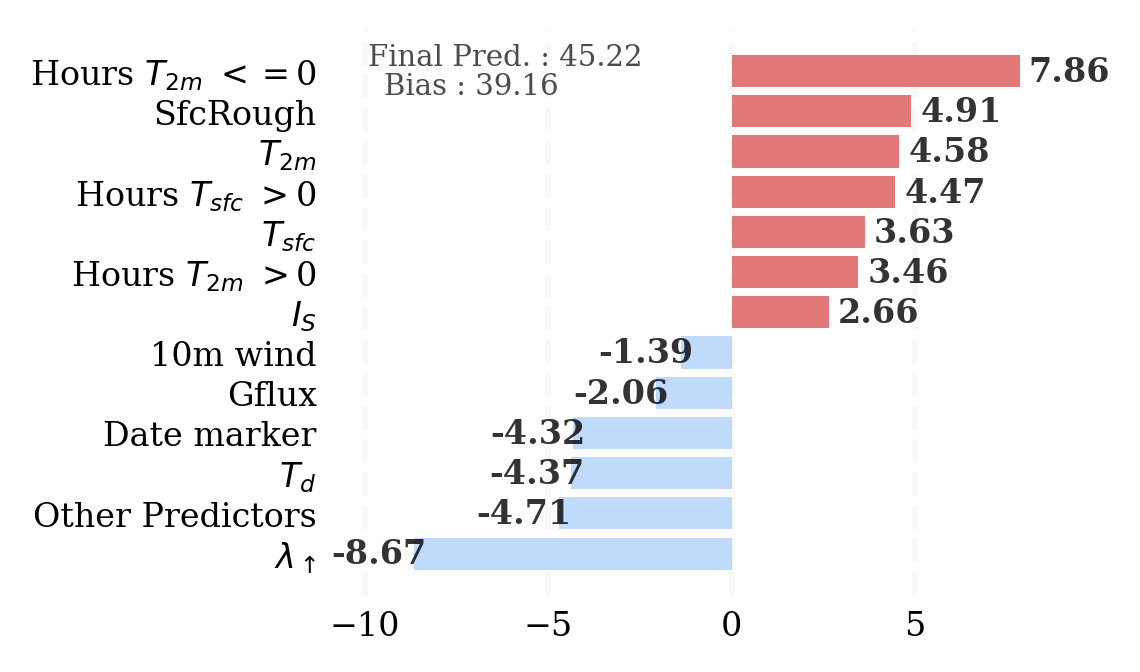

In [4]:
single_example = examples.iloc[[0]]
myInterpreter = InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=single_example,
                                 targets=targets,
                                )
results = myInterpreter.calc_contributions(method='tree_interpreter', data_for_shap=None, performance_based=False)
fig = myInterpreter.plot_contributions(to_only_varname=None, 
                              readable_feature_names=plotting_config.readable_feature_names
                                )

# Tree Interpreter-Based Feature Contribution (Performance-Based)

In [5]:
del myInterpreter
myInterpreter = InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=examples,
                                 targets=targets,
                                )

hits
misses
false_alarms
corr_negs


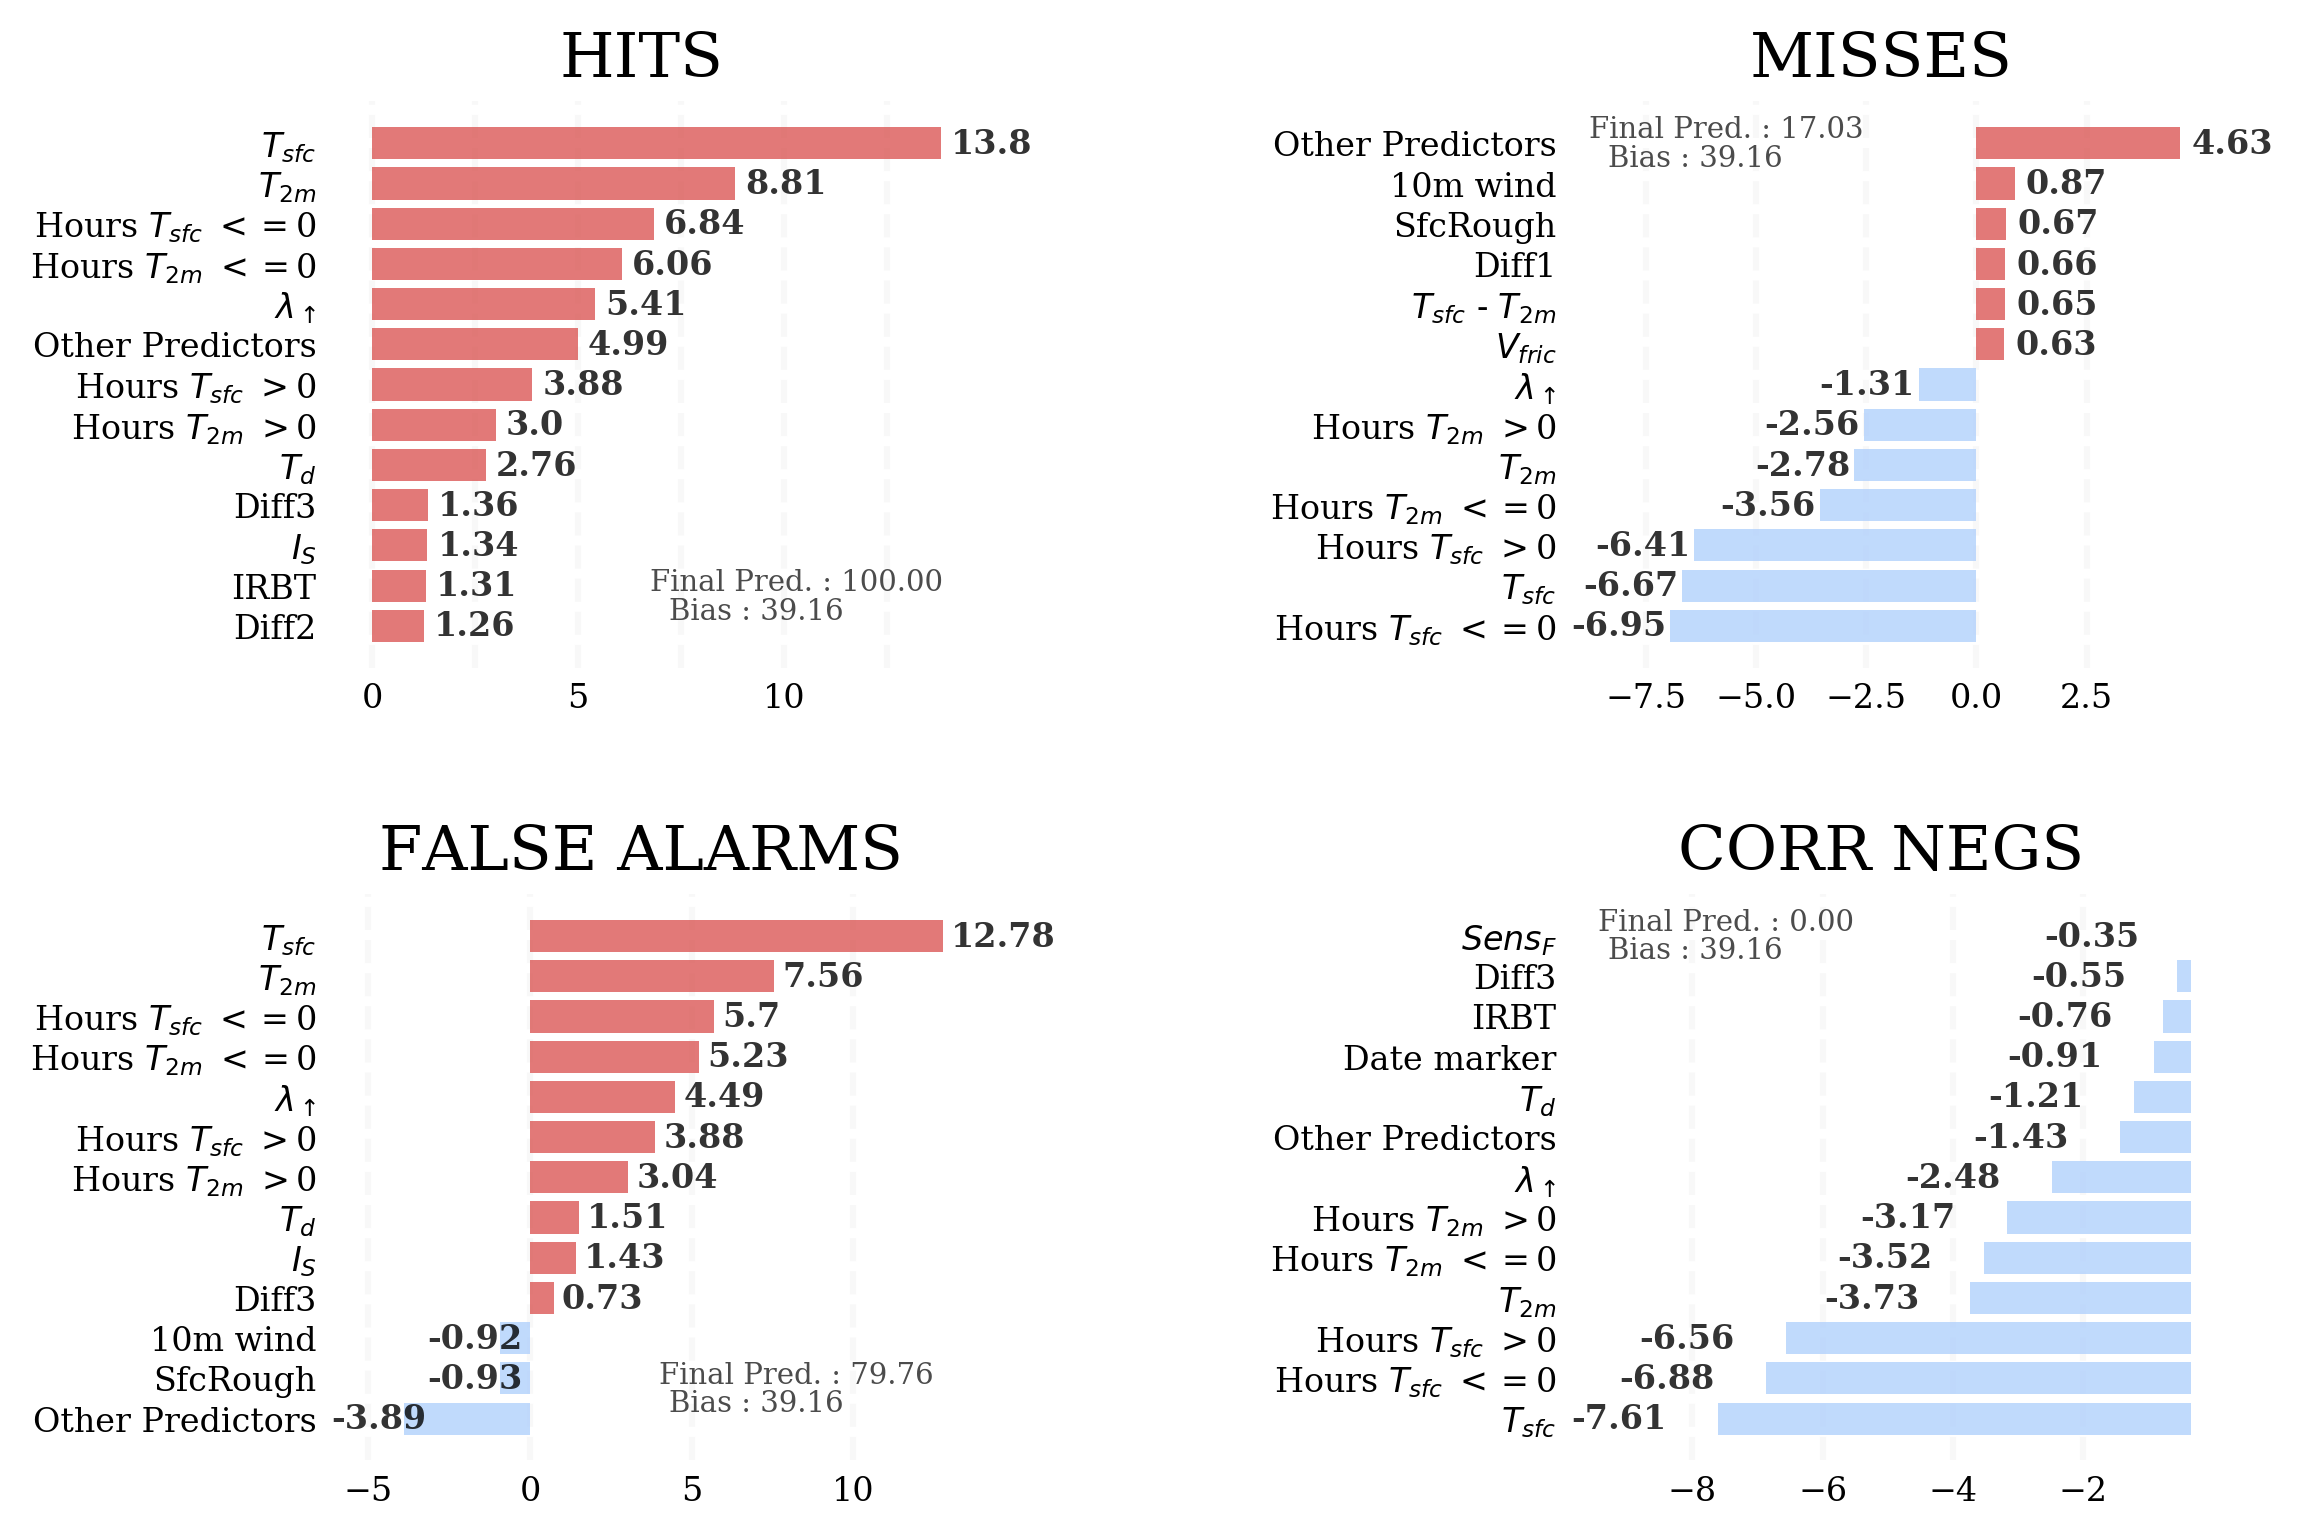

In [6]:
results = myInterpreter.calc_contributions(method='tree_interpreter', data_for_shap=None, performance_based=True)
fig = myInterpreter.plot_contributions(to_only_varname=None, 
                              readable_feature_names=plotting_config.readable_feature_names
                                )

# SHAP-based Feature Contributions (Single Example)

In [ ]:
#del myInterpreter
single_example = examples.iloc[[0]]
myInterpreter = InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=single_example,
                                 targets=targets,
                                )
results = myInterpreter.calc_contributions(method='shap', data_for_shap=examples, performance_based=False, 
                                           shap_sample_size=100)
fig = myInterpreter.plot_contributions(to_only_varname=None, 
                              readable_feature_names=plotting_config.readable_feature_names
                                )

In [ ]:
del myInterpreter
myInterpreter = InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=examples,
                                 targets=targets,
                                )
results = myInterpreter.calc_contributions(method='shap', 
                                           data_for_shap=examples, 
                                           performance_based=True,
                                          subsample_size=100)
fig = myInterpreter.plot_contributions(to_only_varname=None, 
                              readable_feature_names=plotting_config.readable_feature_names
                                )